In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
from mgua import *
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE


import random as rnd
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
tab1 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo2chains.csv")
tab2 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo3chains.csv")
tab3 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo4chains.csv")
tab4 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo5chains.csv")

tab1.shape, tab2.shape, tab3.shape, tab4.shape

((467, 107), (467, 274), (467, 577), (467, 1066))

In [3]:
tab1["key"] = [i for i in range(tab1.shape[0])]
tab2["key"] = [i for i in range(tab2.shape[0])]
tab3["key"] = [i for i in range(tab3.shape[0])]
tab4["key"] = [i for i in range(tab4.shape[0])]

In [4]:
tab = pd.merge(tab1, tab2, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab3, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab4, left_on="key", right_on="key", how="inner")

In [5]:
for i in tab.keys():
    print(i+"; ",end="")

Br1scC3as; C1dcC2dc; C1scC2sc; C1scC3as; C1scC3dc; C1scC4sc; C1scC4ss; C1scN2sc; C1scN3as; C1scN3sc; C1scO2sc; C1scS2sc; C1scS3dc; C1scS4wc; C2arC2ar; C2arC3as; C2arN2ar; C2arN3as; C2arO2ar; C2arS2ar; C2dcC2sc; C2dcC3as; C2dcO1dc; C2drC2sr; C2drC3ds; C2drC4ss; C2scC2sc; C2scC2tc; C2scC3as; C2scC3dc; C2scC4sc; C2scC4ss; C2scF1sc; C2scN1sc; C2scN2sc; C2scN3as; C2scN3sc; C2scO1sc; C2scO2sc; C2scS2sc; C2scS4wc; C2srC2sr; C2srC3as; C2srC3ds; C2srC3ss; C2srC4ss; C2srO2sr; C2srS2sr; C2tcC3as; C2tcN1tc; C3asC3as; C3asC3dc; C3asC3ds; C3asC3sc; C3asC3ss; C3asC4sc; C3asCl1sc; C3asF1sc; C3asN1sc; C3asN2ar; C3asN2sc; C3asN3as; C3asN3dc; C3asN3sc; C3asO1sc; C3asO2ar; C3asO2sc; C3asO2sr; C3asS2ar; C3asS2sc; C3asS2sr; C3asS3dc; C3asS4wc; C3dcC4sc; C3dcN1sc; C3dcN2sc; C3dcO1dc; C3dcO1sc; C3dcO2sc; C3dsC3ds; C3dsN2dr; C3dsS2sr; C3scC4sc; C3scF1sc; C3scO1sc; C3scO2sc; C3ssC3ss; C3ssF1sc; C3ssN2dr; C3ssN3as; C3ssS2sr; C4scC4ss; C4scF1sc; C4scO2sc; C4scS4wc; N1scO2sc; N1scS4wc; N2arN2ar; N2arN3as; N2arO2ar

In [6]:
rnd.seed(0)

In [7]:
tab = tab.drop("key",axis=1)
tab.shape

(467, 2024)

In [8]:
tab.head()

,Br1scC3as,C1dcC2dc,C1scC2sc,C1scC3as,C1scC3dc,C1scC4sc,C1scC4ss,C1scN2sc,C1scN3as,C1scN3sc,...,N3asN2arC2arC3asS4wc,N3asN2arC3asC2scO1sc,N3asN2arC3asC2scO2sc,N3asN2arC3asC3asO1sc,N3asN2arC3asC3asO2sc,N3asN2arC3asC3asS2ar,N3asN2arC3asC3dcO1dc,N3asN2arC3asC3dcO1sc,N3asN2arC3asC3dcO2sc,S2arC3asC3ssC3ssS2sr
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y = pd.read_csv("data_varvara/cox2/cox2_y.csv")

In [10]:
y = np.array(y)

In [11]:
r = []
for i in y:
    s = i[0]
    s = re.sub('inf', '1_000_000_000', str(s))
    r.append(ast.literal_eval(s))

In [12]:
y = np.array(r)
for i in range(y.shape[0]):
    if y[i,1] == 1_000_000_000:
        y[i,1] = np.inf

In [13]:
X = np.array(tab)

In [14]:
X = TfidfTransformer().fit_transform(X)

In [15]:
X = X.todense()

In [16]:
my_pca = PCA(20)

In [17]:
X_pca = my_pca.fit_transform(X)

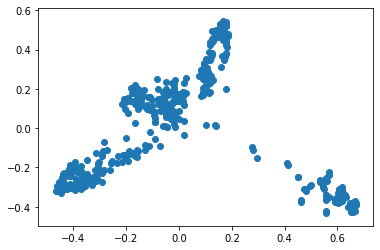

In [18]:
plt.scatter(X_pca[:,0], X_pca[:,1])


In [19]:
my_tsne = TSNE()
X_tsne = my_tsne.fit_transform(X)

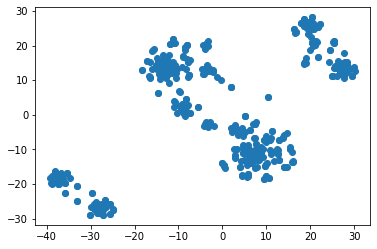

In [20]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

# AGGL


In [21]:
aggl = AgglomerativeClustering(n_clusters=5, linkage="average", affinity="manhattan")

In [22]:
res = aggl.fit_predict(X)
cluster_structure = res

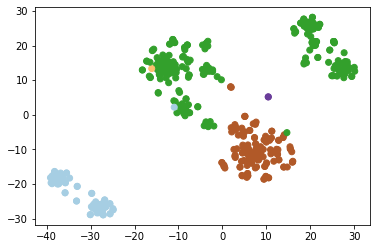

In [23]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

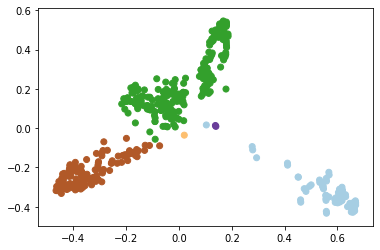

In [24]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [25]:
silhouette_score(X,res)

0.1509072811004872

In [26]:
mdl = Ridge(2)

# Случайный лес

In [27]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    if X_in_clust.shape[0] == 1:
        continue
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl_select_features = RandomForestRegressor(n_estimators=150, n_jobs=-1, 
                                                    max_depth=10, min_samples_leaf=4, 
                                                    criterion="mse", max_features="log2")
        mdl_select_features.fit(X_train, y_train)
        importances = mdl_select_features.feature_importances_
        importances_indexes = []
        for i in range(len(importances)):
            if abs(importances[i]) > 2e-3:
                importances_indexes.append(i)
#         print(X_train.shape)
#         print(X_test.shape)
        if len(importances_indexes) != 0:
            X_train = X_train[:,importances_indexes]
            X_test = X_test[:,importances_indexes]
#         print("AF", X_train.shape)
#         print("AF", X_test.shape)
        
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1
print("\\bigskip")
print()
print("\\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}")
print()
print("MSE " + str(round(MSE(ans_all,y_new[:]))))
print()
print("MAE " + str(round(MAE(ans_all,y_new[:]),4)))
print()
print("\\(R^2\\) " + str(round(r2_score(y_new[:], ans_all),4)))
print()
print("\\bigskip")

Значения ошибок на 1-ом кластере размера 78

MSE 519.8585

MAE 11.227

\(R^2\) -0.0776

\bigskip

Значения ошибок на 2-ом кластере размера 248

MSE 1291.0613

MAE 28.0737

\(R^2\) 0.064

\bigskip

Значения ошибок на 3-ом кластере размера 2

MSE 0.0005

MAE 0.022

\(R^2\) -3.0

\bigskip

Значения ошибок на 4-ом кластере размера 138

MSE 843.205

MAE 17.9376

\(R^2\) 0.0293

\bigskip

\bigskip

\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}

MSE 1024.0

MAE 22.1318

\(R^2\) 0.0674

\bigskip


# МГУА

In [29]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    if X_in_clust.shape[0] == 1:
        continue
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl_select_features = MGUA(20,20)
#         print(X_train.shape)
        mdl_select_features.fit(X_train, y_train)
        indexes = mdl_select_features.get_indexes()
        indexes = np.unique(np.array(indexes).reshape(-1))
#         print(X_train.shape)
#         print(X_test.shape)
        if len(importances_indexes) != 0:
            X_train = X_train[:,importances_indexes]
            X_test = X_test[:,importances_indexes]
#         print("AF", X_train.shape)
#         print("AF", X_test.shape)
        
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1
print("\\bigskip")
print()
print("\\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}")
print()
print("MSE " + str(round(MSE(ans_all,y_new[:]))))
print()
print("MAE " + str(round(MAE(ans_all,y_new[:]),4)))
print()
print("\\(R^2\\) " + str(round(r2_score(y_new[:], ans_all),4)))
print()
print("\\bigskip")

(70, 2024)
(70, 2024)
(70, 2024)
(70, 2024)
(70, 2024)
(70, 2024)
(70, 2024)
(70, 2024)
(71, 2024)
(71, 2024)
Значения ошибок на 1-ом кластере размера 78

MSE 507.5047

MAE 10.9059

\(R^2\) -0.052

\bigskip

(223, 2024)
(223, 2024)
(223, 2024)
(223, 2024)
(223, 2024)
(223, 2024)
(223, 2024)
(223, 2024)
(224, 2024)
(224, 2024)
Значения ошибок на 2-ом кластере размера 248

MSE 1317.4564

MAE 28.178

\(R^2\) 0.0449

\bigskip

(1, 2024)
(1, 2024)
Значения ошибок на 3-ом кластере размера 2

MSE 0.0005

MAE 0.022

\(R^2\) -3.0

\bigskip

(124, 2024)
(124, 2024)
(124, 2024)


/home/evgeny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/evgeny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/evgeny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/evgeny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/evgeny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined wit

(124, 2024)
(124, 2024)
(124, 2024)
(124, 2024)
(124, 2024)
(125, 2024)
(125, 2024)
Значения ошибок на 4-ом кластере размера 138

MSE 827.2805

MAE 17.8689

\(R^2\) 0.0476

\bigskip

\bigskip

\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}

MSE 1031.0

MAE 22.1132

\(R^2\) 0.0608

\bigskip


In [69]:
ind = [[1,2,3],[1,4,5]]

In [70]:
np.unique(np.array(ind).reshape(-1))

array([1, 2, 3, 4, 5])